<a href="https://colab.research.google.com/github/AlexanderFriedrichsen/AlexanderFriedrichsen.github.io/blob/main/Poker_Hands.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cleaning Poker Hand Histories From Kaggle



In [ ]:
import numpy as np
import pandas as pd
import os
from pathlib import Path
import re
import sklearn
import matplotlib.pylab as plt
%matplotlib inline

## Count games:

In [ ]:
os.getcwd()

p = Path('.')

total = 0
for file in p.glob('**/*.txt'):
    with open(file) as f:
        count_games = 0
        for line in f:
            if "Game started at:" in line:
                count_games += 1
        print(f'file "{file.name}" has {count_games} games')
        total += count_games
print(f'In totality, there are {total} games among all files')

file "quesrtions.txt" has 0 games
file "Export Holdem Manager 2.0 12292016131233.txt" has 2468 games
file "Export Holdem Manager 2.0 12302016144830.txt" has 42688 games
file "File196.txt" has 1000 games
file "File198.txt" has 1000 games
file "File199.txt" has 1000 games
file "File200.txt" has 1000 games
file "File201.txt" has 1000 games
file "File203.txt" has 1000 games
file "File204.txt" has 1000 games
In totality, there are 52156 games among all files


## Make a list of all the games separated by attribute

In [ ]:
# isolate games
def getgames(file):
    for match in re.finditer(r'Game started at.*?Game ended at.*?\n\n', file,re.MULTILINE + re.DOTALL):
        yield match.group(0)
# next().group(0)

# isolate into part
def separate(game):
    match = re.match(r'Game started at: (.*)Game ID: (.*?)\n(.*)(Player.*)------ Summary ------(.*)Game ended at: (.*)', game, re.MULTILINE + re.DOTALL)
    try:
        start, gameid, playerstartmoney, actions, summary, end = match.groups()
        return start.strip(), gameid.strip(), playerstartmoney, actions, summary, end.strip()
    except AttributeError:
        return game, "", "", "", "", ""

files_games = []
for i, file in enumerate(p.glob('**/*.txt')):
    with open(file) as f:
        games = getgames(''.join(f.readlines()))
        file_games = []
        for game in games:
            parts = separate(game)
            parts = list(parts)
            parts.append(f.name)
            file_games.append(parts)
    files_games.extend(file_games)

In [ ]:
#double check we have the right number of games
len(files_games)

52156

## Make the DF

In [ ]:
original_hands = (pd.DataFrame(files_games, columns=['Start', 'ID', 'Money', 'Actions', 'Summary', 'End', 'File'])
        .assign(NPlayer=lambda df:df.Money.str.count('Seat \d')-1) #modified to correct number of players (-1 for seat \d is the button) and to fix counting usernames with 'seat' in them
     )
original_hands

Start                                                ID  \
0      2016/11/29 15:25:37        787027613 0.50/1 (PRR) Karkadann (Hold'em)   
1      2016/11/29 15:26:38        787027929 0.50/1 (PRR) Karkadann (Hold'em)   
2      2016/11/29 15:25:11        787027464 0.50/1 (PRR) Karkadann (Hold'em)   
3       2016/11/29 15:25:1      787027410 0.50/1 (PRR) Kraken - 10 (Hold'em)   
4      2016/11/29 15:24:16      787027157 0.50/1 (PRR) Kraken - 10 (Hold'em)   
...                    ...                                               ...   
52151  2016/10/15 10:34:59  751157639 0.25/0.50 (PRR) Gorgons - 16 (Hold'em)   
52152  2016/10/15 10:35:29  751157850 0.25/0.50 (PRR) Gorgons - 15 (Hold'em)   
52153  2016/10/15 10:35:37   751157906 0.25/0.50 (PRR) Gorgons - 5 (Hold'em)   
52154  2016/10/15 10:35:40  751157922 0.25/0.50 (PRR) Gorgons - 16 (Hold'em)   
52155   2016/10/15 10:36:4  751158089 0.25/0.50 (PRR) Gorgons - 16 (Hold'em)   

                                                   Money  \
0      Seat 7 is the button\nSeat 1: StephCurry (105....   
1      Seat 8 is the button\nSeat 1: StephCurry (105....   
2      Seat 6 is the button\nSeat 1: StephCurry (105....   
3      Seat 6 is the button\nSeat 1: AironVega (100)....   
4      Seat 5 is the button\nSeat 1: AironVega (101)....   
...                                                  ...   
52151  Seat 5 is the button\nSeat 1: superman51210 (3...   
52152  Seat 4 is the button\nSeat 2: Milkin Cows (65....   
52153  Seat 6 is the button\nSeat 1: IlxxxlI (53.39)....   
52154  Seat 1 is the button\nSeat 1: superman51210 (4...   
52155  Seat 3 is the button\nSeat 1: superman51210 (4...   

                                  Actions  \
0           Player dankmann mucks cards\n   
1              Player StephCurry checks\n   
2          Player AironVega mucks cards\n   
3            Player aleks0v mucks cards\n   
4         Player Sephiroth1 mucks cards\n   
...                                   ...   
52151  Player superman51210 mucks cards\n   
52152  Player EQUITYisnotEV mucks cards\n   
52153        Player IlxxxlI mucks cards\n   
52154    Player Milkin Cows mucks cards\n   
52155   Player IampokerKidd mucks cards\n   

                                                 Summary                  End  \
0      \nPot: 2.50. Rake 0\nPlayer StephCurry does no...  2016/11/29 15:26:36   
1      \nPot: 24.95. Rake 1.07. JP fee 0.24\nBoard: [...   2016/11/29 15:28:9   
2      \nPot: 2.50. Rake 0\nPlayer StephCurry does no...  2016/11/29 15:25:35   
3      \nPot: 6.18. Rake 0.22. JP fee 0.10\nBoard: [J...   2016/11/29 15:26:4   
4      \nPot: 5. Rake 0\nPlayer AironVega does not sh...  2016/11/29 15:24:59   
...                                                  ...                  ...   
52151  \nPot: 11. Rake 0\n*Player superman51210 mucks...  2016/10/15 10:35:37   
52152  \nPot: 1.25. Rake 0\nPlayer Milkin Cows does n...   2016/10/15 10:36:4   
52153  \nPot: 2.85. Rake 0.11. JP fee 0.04\nBoard: [5...  2016/10/15 10:36:11   
52154  \nPot: 0.50. Rake 0\nPlayer superman51210 does...   2016/10/15 10:36:2   
52155  \nPot: 12.59. Rake 0.44. JP fee 0.22\nBoard: [...  2016/10/15 10:37:34   

                                                    File  NPlayer  
0      archive\Export Holdem Manager 2.0 122920161312...        9  
1      archive\Export Holdem Manager 2.0 122920161312...        9  
2      archive\Export Holdem Manager 2.0 122920161312...        9  
3      archive\Export Holdem Manager 2.0 122920161312...        6  
4      archive\Export Holdem Manager 2.0 122920161312...        6  
...                                                  ...      ...  
52151                                archive\File204.txt        4  
52152                                archive\File204.txt        5  
52153                                archive\File204.txt        4  
52154                                archive\File204.txt        4  
52155                                archive\File204.txt        4  

[52156 r

In [ ]:
'''(commented for one by one inspection)'''
original_hands['Money'].head(1).values
#original_hands['Summary'].head(1).values

array(['Seat 7 is the button\nSeat 1: StephCurry (105.78).\nSeat 2: PANDAisEVIL (101).\nSeat 3: AironVega (103.20).\nSeat 4: IlxxxlI (43).\nSeat 5: pineapplesand (40).\nSeat 6: dankmann (206.52).\nSeat 7: ElvenEyes (115).\nSeat 8: gust (46).\nSeat 9: VegetablesArentYummy (273.59).\nPlayer gust has small blind (0.50)\nPlayer VegetablesArentYummy has big blind (1)\nPlayer gust received a card.\nPlayer gust received a card.\nPlayer VegetablesArentYummy received a card.\nPlayer VegetablesArentYummy received a card.\nPlayer StephCurry received a card.\nPlayer StephCurry received a card.\nPlayer PANDAisEVIL received a card.\nPlayer PANDAisEVIL received a card.\nPlayer AironVega received a card.\nPlayer AironVega received a card.\nPlayer IlxxxlI received card: [9d]\nPlayer IlxxxlI received card: [7d]\nPlayer pineapplesand received a card.\nPlayer pineapplesand received a card.\nPlayer dankmann received a card.\nPlayer dankmann received a card.\nPlayer ElvenEyes received a card.\nPlayer ElvenE

In [ ]:
#inspect the ranges of player counts in games
for i in range(0,25):
    print(i, sum(original_hands['NPlayer']==i))
#We don't want to work with anything over 9 players. 


print("\n\nlength: "+ str(len(original_hands)))
#lets look at one of the ones over 9 to see if it is beign counted correctly
#print(original_hands.loc[original_hands['NPlayer']==16]['Money'].values)
#CLEANED: looks like the username has the word 'seat' in it. Gotta refine my NPlayer count in the original creation    

# lowercase all? what about usernames? Something like this:
#original_training_data['email'] = original_training_data['email'].str.lower()
#test['email'] = test['email'].str.lower()

0 0
1 0
2 285
3 1149
4 4434
5 13964
6 22330
7 2412
8 4237
9 3345
10 0
11 0
12 0
13 0
14 0
15 0
16 0
17 0
18 0
19 0
20 0
21 0
22 0
23 0
24 0


length: 52156


What do I want to do to the dataset next? Well, the money column has all the betting information. What do I need to be able to answer my question about position? Should I break each of the player's positions into columns? Currently, each row is one game. Do I need to break down each row into another frame...


make each seat a column: one-hot encoding.
Summary-> Winner #a list of numbers 1-8 that corresponds to the seat(s) that won

make the value of the rows for each seat be 0 if didn't win hand, 1 if did. For now, ignore "by how much" they won.

What type of regression am I doing? Is this classification? Yes, if I stick to win/lose aka yes/no.

Go back and look at classifaction ipynb.

## Additional Questions For Analysis

-Analyze average time it takes for a hand to be played.

-Average bet size

-Bet size in relation to stack size

-time series data for user: IlxxxlI (appears to be teh source of these hand histories)

In [ ]:
#Make the new columns for seat_stack, and a column for button. These columns could be separate, or could be formatted as a dictionary.
#Easier to feed into a model with separate, so let's do that.
#resulting columns will have seat player names followed by stack size
def separate_seat_stacks(seats):
    """
    Input:
        seats (string): a string with a list of starting seats and stack sizes
    """    
    
    seat_stacks_matches=[]
    seat_stacks_matches.append(re.match('Seat (\d) is the button', seats, re.MULTILINE).group(1))
    
    pattern = re.compile('Seat \d: ([^\\\n]+ )?([^\\\n]+)?\(([0-9]*\.?[0-9])+\)')
    for matchedtext in re.finditer(pattern, seats):
        seat_stacks_matches.append(matchedtext.group())
        #print(m.group(1), "groups", m.groups())
        
    #print(seat_stacks_matches, "1")   
    
    if len(seat_stacks_matches) <= 10: #10 because I added in button identifier
        for i in (range(0, 10-len(seat_stacks_matches))):
            seat_stacks_matches.append('')
    else:
        print("greater than 9 seats")
        
   # print(seat_stacks_matches, "2")
    
    try:
        button, seat1, seat2, seat3, seat4, seat5, seat6, seat7, seat8, seat9 = seat_stacks_matches
        return seat_stacks_matches
        
    except: #AttributeError:
        print("attribute error")
        return ["", "", "", "", "", "", "", "", "", ""]              
                  
def add_seat_stacks(data):
    """
    Input:
        data (data frame): a data frame containing a text field Money to be matched with re
    """
    stacks = data.copy()
    seat_columns = ['button_id', 'stack1', 'stack2', 'stack3', 'stack4', 'stack5', 'stack6', 'stack7', 'stack8', 'stack9']
    stacks = stacks.reindex(columns=stacks.columns.tolist() + seat_columns) # add empty columns
    
    for index, row in stacks.iterrows():
        stacks.loc[index, seat_columns] = separate_seat_stacks(row['Money'])
        #print(stacks.loc[i, seat_columns])
        #break #for testing purposes
    return stacks

In [ ]:
def remove_nplayer_hands(dfin, num_players):
    """
    takes in a df and and int
    removes all hands with int number players from df
    returns modified df
    #when a hand is 2 players, where do the players sit? (anywhere, it would appear)
    #print(original_hands.loc[original_hands['NPlayer']==2]['Money'].values)
    #Nor do we want 2 players, because the method we are using to categorize position doesn't work when button is also small blind
    """

    df = dfin.copy()
    df.drop(df.loc[df['NPlayer']==num_players].index, inplace=True)
    return df

In [ ]:
def rearrange_seats(hands):
    """
    # takes in df
    # need to make a function that will switch around the info to put seats in their actual seat, where columns
    # are: 'BTN', 'SB', 'BB', 'UTG', 'UTG+1', 'MP', 'LJ', 'HJ', 'CO'
    # since games are different sizes, the first and last 3 positions should be prioritized. There is always BTN, SB, and BB.
    # returns sorted df of named columns
    """
    df = hands.copy()
    seat_columns = ['button_id', 'stack1', 'stack2', 'stack3', 'stack4', 'stack5', 'stack6', 'stack7', 'stack8', 'stack9']

    col_stack_names = ['BTN_s', 'SB_s', 'BB_s', 'UTG_s', 'UTG+1_s', 'MP_s', 'LJ_s', 'HJ_s', 'CO_s']
    df = df.reindex(columns=df.columns.tolist() + col_stack_names) # add empty columns

    count=0
    btn_txt = ""
    b_id=0
    
    #df.loc[(df['NPlayer']==i), col_stack_names[i:10]] = "" #make all cols with seats not in the hand empty stacked
    for index, row in df.iterrows():
        btn_txt = ""
        nplayer = int(row['NPlayer'])
        
        #for column in df.loc[index, seat_columns[0:nplayer+1]].columns: #columns
        for column in seat_columns[0:nplayer+1]: #columns
            #print(index)
            btn_txt+=str(row[column])#str(stack_text.loc[index,column])
            #print(btn_txt)

        #b_id=int(stack_text.loc[index,'button_id'])
        b_id = int(row["button_id"])
        #print("button id: "+ str(b_id))
        #print(type(b_id)) 

        #this worked! not have to re match the 'BTN_s' to the button_id  
        pattern = re.compile('Seat '+str(b_id)+': ([^\\\n ]+ )?([^\\\n\)]+)?\(([0-9]*\.?[0-9])+') # add button_id to matcher Seat +7+: \w+ \(([0-9]*\.?[0-9]+)\)
        #print(pattern)
        for matchedtext in re.finditer(pattern, btn_txt):
            df.loc[index, 'BTN_s'] = matchedtext.group()



        count=0
        for j in range(1, (10-b_id)):
            pattern = re.compile('Seat '+str((b_id+j))+': ([^\\\n ]+ )?([^\\\n\)]+)?\(([0-9]*\.?[0-9])+')
            for matchedtext in re.finditer(pattern, btn_txt):
                #print("j: " + str(j) + matchedtext.group())
                if count==0: #add SB
                    df.loc[index, 'SB_s'] = matchedtext.group()
                    count+=1
                    #print("sb added")
                elif count==1: #add BB
                    df.loc[index, 'BB_s'] = matchedtext.group()
                    count+=1
                elif count==2: #add UTG
                    df.loc[index, 'UTG_s'] = matchedtext.group()
                    count+=1
                elif count==3: #add UTG+1
                    df.loc[index, 'UTG+1_s'] = matchedtext.group()
                    count+=1
                elif count==4: #add MP
                    df.loc[index, 'MP_s'] = matchedtext.group()
                    count+=1
                elif count==5: #add LJ
                    df.loc[index, 'LJ_s'] = matchedtext.group()
                    count+=1
                elif count==6: #add HJ
                    df.loc[index, 'HJ_s'] = matchedtext.group()
                    count+=1
                elif count==7: #add CO
                    df.loc[index, 'CO_s'] = matchedtext.group()
                    count+=1
        if (count != nplayer):
            for k in range(1, b_id):
                pattern = re.compile('Seat '+str(k)+': ([^\\\n ]+ )?([^\\\n\)]+)?\(([0-9]*\.?[0-9])+')
                for matchedtext in re.finditer(pattern, btn_txt):
                    if count==0: #add SB
                        df.loc[index, 'SB_s'] = matchedtext.group()
                        count+=1
                    elif count==1: #add BB
                        df.loc[index, 'BB_s'] = matchedtext.group()
                        count+=1
                    elif count==2: #add UTG
                        df.loc[index, 'UTG_s'] = matchedtext.group()
                        count+=1
                    elif count==3: #add UTG+1
                        df.loc[index, 'UTG+1_s'] = matchedtext.group()
                        count+=1
                    elif count==4: #add MP
                        df.loc[index, 'MP_s'] = matchedtext.group()
                        count+=1
                    elif count==5: #add LJ
                        df.loc[index, 'LJ_s'] = matchedtext.group()
                        count+=1
                    elif count==6: #add HJ
                        df.loc[index, 'HJ_s'] = matchedtext.group()
                        count+=1
                    elif count==7: #add CO
                        df.loc[index, 'CO_s'] = matchedtext.group()
                        count+=1
        if (count==nplayer-1):
            print("**********all spots found**********")
        else:
            print("not all data found, count = " + str(count) + " row: ")
            print(str(df.loc[index].values))
        #break # testing purposes
    return df;

In [ ]:
def sort_stack_text(text):
    """
    takes in a stack text
    returns username, stack size
    """
    
    user=""
    stack=0
    try:
        pattern= re.compile('^Seat \d: (([^\\\n]+ )?([^\\\n]+))?\(([0-9]*\.?[0-9]+)')
        for matchedtext in re.finditer(pattern, text):
            user = matchedtext.groups()[0]
            user = user.strip()
            stack = matchedtext.groups()[3]
    except:
        print(text)
        user="INVALID"
        stack=0 #what should this be? try 0

    return user, stack

In [ ]:
#seat profit as well:
def add_seat_profit(data):
    """
    Input:
        data (data frame): a data frame containing a text field Summary to be matched with re
    """
    df = data.copy()
    prof_columns = ['Pot', 'BTN_+$','SB_+$', 'BB_+$', 'UTG_+$', 'UTG+1_+$', 'MP_+$', 'LJ_+$', 'HJ_+$', 'CO_+$']
    df = df.reindex(columns=df.columns.tolist() + prof_columns) # add empty columns
    nplayer=0
    col_stack_names = ['BTN_s', 'SB_s', 'BB_s', 'UTG_s', 'UTG+1_s', 'MP_s', 'LJ_s', 'HJ_s', 'CO_s']
    for i, row in df.iterrows():
        #summary=df.loc[index, "Summary"]
        summary= row["Summary"]
        #print(summary + "summary: **************" + )
        #add the pot
        pattern=re.compile('Pot: ([0-9]*\.?[0-9]+)')
        for matchedtext in re.finditer(pattern, summary):
            #print("pot: " +matchedtext.groups()[0])
            pot = matchedtext.groups()[0]
            try:
                df.loc[i, prof_columns[0]] =pot
            except:
                print("error occured")
        #print(df.loc[i, 'NPlayer'])
        nplayer=df.loc[i, 'NPlayer']
        #print(type(nplayer))
        #add the seat profits
        for j in range(nplayer, 9):
            #print(prof_columns[j+1])
            df.loc[i, prof_columns[j+1]] = 0
        for j, column in enumerate(col_stack_names[0:nplayer]):
            user, stack = sort_stack_text(df.loc[i, column])
            #print("user:" +user)
            pattern=re.compile(user +'([\S\s]{2,70}(?=(Wins:|Loses:)))(Wins:|Loses:) ([0-9]*\.?[0-9]+)')
            for matchedtext in re.finditer(pattern, summary):
                #print("seat: "+column +" matched text: " +matchedtext.groups()[3])
                if (matchedtext.groups()[2]=="Loses:"):
                    df.loc[i, prof_columns[j+1]] = np.negative(float(matchedtext.groups()[3]))
                else:
                    df.loc[i, prof_columns[j+1]] = matchedtext.groups()[3]

                
        #print(stacks.loc[i, seat_columns])
        #break #for testing purposes
    return df


In [ ]:
def stack_text_to_number(hands):
    '''
    takes in a df
    '''
    user=""
    df=hands.copy()
    col_stack_names = ['BTN_s', 'SB_s', 'BB_s', 'UTG_s', 'UTG+1_s', 'MP_s', 'LJ_s', 'HJ_s', 'CO_s']
    for index, row in df.iterrows():
        for col in col_stack_names:
            #print(df.loc[index, col])
            user, df.loc[index, col] = sort_stack_text(row[col])
    return df

In [ ]:
#split before performing analysis
from sklearn.model_selection import train_test_split

train, val = train_test_split(original_hands, train_size=0.9, test_size=0.1, random_state=42)

In [ ]:
dataTest=dataTest.iloc[:,-1:-10:-1].applymap(float)
for col in dataTest.columns[-1:-10:-1]:
    dataTest.loc[dataTest["NPlayer"]==5, col]

KeyError: 'NPlayer'

NPlayer   BTN_s    SB_s    BB_s   UTG_s  UTG+1_s    MP_s    LJ_s  \
6542       9.0   21.14   52.48   96.67   50.00   129.56   50.50   50.00   
2372       9.0   79.73   98.59   50.00   50.75    29.77   45.86   49.24   
46100      9.0  160.00  403.80  222.13  253.35   116.60  433.65  339.41   
50708      9.0   57.09   71.73   51.22   45.66    67.17   58.64   65.44   
48694      9.0  272.62  244.82   80.00  232.06   217.44  203.00   79.10   
...        ...     ...     ...     ...     ...      ...     ...     ...   
19118      9.0   50.11  101.00  118.21  113.31    45.00   75.66   86.05   
189        9.0   40.00   98.16  111.36  101.50    50.00  260.19  100.00   
6396       9.0   32.74   53.09   50.00   53.35    65.00   20.59   53.02   
6265       9.0   28.36   25.00   12.65   10.00    29.60   45.94    9.87   
11284      9.0   56.24   73.20   57.51   22.85    50.00   56.72   43.96   

         HJ_s    CO_s  
6542    51.92   57.99  
2372    28.79   47.73  
46100  605.95  400.00  
50708   77.55   41.62  
48694  425.97  129.52  
...       ...     ...  
19118  187.61   27.66  
189    106.14  100.00  
6396    94.42   50.00  
6265    34.66   29.53  
11284   45.37   50.00  

[2975 rows x 10 columns]

# Pre-processing pipeline

In [ ]:
def select_columns(data, *columns):
    """Select only columns passed as arguments."""
    return data.loc[:, columns]

In [ ]:
def pipe_data(data):
    """Process the data for a guided model."""
    #remove hands with 2 players CLEAN
    #data = remove_nplayer_hands(data, 2)
    
    #transform money column into stack columns
    #data = add_seat_stacks(data)
    #reset the index on the df (do I need this? probably not)
    #data.reset_index(drop=True, inplace=True)
    #create new stack columns and sort by position in hand
    #data = rearrange_seats(data)
    #create seat profit columns
    #data = add_seat_profit(data)
    #make stack column solely a float
    #data = stack_text_to_number(data)
    columns=['NPlayer','BTN_s', 'SB_s', 'BB_s', 'UTG_s', 'UTG+1_s', 'MP_s', 'LJ_s', 'HJ_s', 'CO_s','Pot', 'BTN_+$','SB_+$', 'BB_+$', 'UTG_+$', 'UTG+1_+$', 'MP_+$', 'LJ_+$', 'HJ_+$', 'CO_+$']
    data = data.loc[:, columns]
    data=data.applymap(float)
    
    # Return predictors and response variables separately
    X = data.drop(['Pot', 'BTN_+$', 'SB_+$', 'BB_+$', 'UTG_+$', 'UTG+1_+$', 'MP_+$', 'LJ_+$', 'HJ_+$', 'CO_+$'], axis = 1)
    y = data.loc[:, ['Pot', 'BTN_+$', 'SB_+$', 'BB_+$', 'UTG_+$', 'UTG+1_+$', 'MP_+$', 'LJ_+$', 'HJ_+$', 'CO_+$']]
    
    return X, y

In [ ]:
# Training and validation data through the pipeline
# y_train and y_val will still by matrices, as multiple columns are passed in
X_train, y_train = pipe_data(data)
X_val, y_val = pipe_data(data2) 


## Doing it manually so that I can make edits before wiping out the columns and don't have to rerun

In [ ]:
#train (doing it here to be safe)  
    
data = remove_nplayer_hands(train, 2)

#transform money column into stack columns
data = add_seat_stacks(data)
#create new stack columns and sort by position in hand
data = rearrange_seats(data)
#create seat profit columns
data = add_seat_profit(data)
#make stack column solely a float
data = stack_text_to_number(data)
cols =['Pot', 'BTN_+$','SB_+$', 'BB_+$', 'UTG_+$', 'UTG+1_+$', 'MP_+$', 'LJ_+$', 'HJ_+$', 'CO_+$']
for column in cols:
    data[column].replace(np.nan, 0, inplace=True)

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


In [ ]:
#val (doing it here to be safe)    
data2 = remove_nplayer_hands(val, 2)

#transform money column into stack columns
data2 = add_seat_stacks(data2)
#create new stack columns and sort by position in hand
data2 = rearrange_seats(data2)
#create seat profit columns
data2 = add_seat_profit(data2)
#make stack column solely a float
data2 = stack_text_to_number(data2)
cols =['Pot', 'BTN_+$','SB_+$', 'BB_+$', 'UTG_+$', 'UTG+1_+$', 'MP_+$', 'LJ_+$', 'HJ_+$', 'CO_+$']
for column in cols:
    data2[column].replace(np.nan, 0, inplace=True)

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found***

**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
**********all spots found**********
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


In [ ]:
y_train= y_train.applymap(float)
X_train =X_train.applymap(float)
X_val=X_val.applymap(float)
y_val=y_val.applymap(float)

[9.53206979284934, 0.106201238191127, -0.285344358518455, -0.4546211520747199, 0.028749812557571603, 0.07291981748462971, 0.1200649086352049, -0.03552665966881601, -0.003334975686039287, 0.006789057646579979]


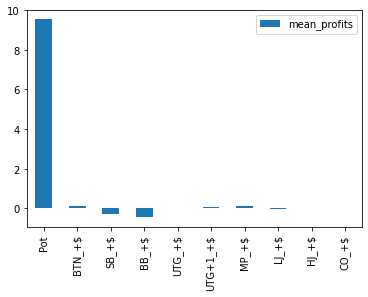

In [ ]:
means=[]
for col in y_train:
    means.append(np.mean(y_train[col].values))
# Create a sample dataframe with an text index
plotdata = pd.DataFrame(
    {"mean_profits": means[0:10]}, 
    index=['Pot','BTN_+$','SB_+$', 'BB_+$', 'UTG_+$', 'UTG+1_+$', 'MP_+$', 'LJ_+$', 'HJ_+$', 'CO_+$'])
# Plot a bar chart
plotdata.plot(kind="bar")
print(means)

In [ ]:
dataTest=data.copy()

dataTest=dataTest.loc[dataTest['NPlayer']==9]

X_trTest, y_trTest = pipe_data(dataTest)
y_trTest= y_trTest.applymap(float)
X_trTest =X_trTest.applymap(float)


valTest=data2.copy()

valTest=valTest.loc[valTest['NPlayer']==9]

X_VTest, y_VTest = pipe_data(valTest)
y_VTest= y_VTest.applymap(float)
X_VTest =X_VTest.applymap(float)

[18.68759663865546, 0.0006487394957982834, -0.6626319327731093, -0.6403428571428571, 0.24515966386554622, 0.348181512605042, 0.12411092436974788, -0.242655462184874, -0.1820806722689076, 0.106527731092437]


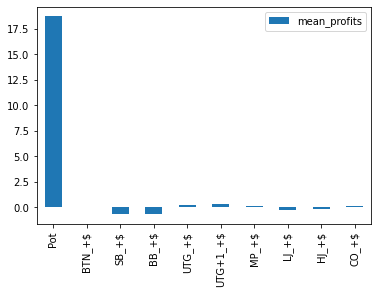

In [ ]:
means=[]
for col in y_trTest:
    means.append(np.mean(y_trTest[col].values))
# Create a sample dataframe with an text index
plotdata = pd.DataFrame(
    {"mean_profits": means[0:10]}, 
    index=['Pot', 'BTN_+$','SB_+$', 'BB_+$', 'UTG_+$', 'UTG+1_+$', 'MP_+$', 'LJ_+$', 'HJ_+$', 'CO_+$'])
# Plot a bar chart
plotdata.plot(kind="bar")
print(means)

Looking at the above graph, which is just an aggregation of the data, it doesn't match up with my heuristics. This could be becasue they are wrong... but more likely I suspect it is because of the imputation method I am using i.e. NaN->0, and this imputation is done significantly more to the later positions.

# Modeling
Now that the data set has been split into train and validation subsets, and all of the features have been engineered that we are looking to do the initial modeling on, lets start with a linear regression, and then move on to a random forest. It is hard to know, even with my domain knowledge about poker, whether the relationships we find will be linear or not. That is why we will try both!

### Linear Regression:

So, let's have a think about the variables we have right now. The stack sizes are all quantitative, as is the NPlayer. Convenient! Well, convenient and engineered.

We are trying to predict not one variable, but several. In fact, 9 different variables, one for the winnings of each seat. Of course, the intial question only regards the profit of the button seat, which is where I will start for simplicity. Along with this start, I will model pot size, which I suspect will have linear relationship with NPlayer.

What can I expect to see from this regression? Practically, as the NPlayer in a hand goes down, the number of hands won by any given seat should increase. What is harder to predict is whether this increase is tied to position at the table; does the button win proportionally more hands in a 9 player hand than in a 3 player hand compared to the expected average hands won for 3 player and 9 player hands?

In addition, the stack size may or may not lead us to believe that a larger stack size wins more money. Does this stack size have a greater effect when sitting in the button, compared to in other seats?



In [ ]:
from sklearn import linear_model as lm

linear_model = lm.LinearRegression()

In [ ]:
from sklearn import metrics
from math import sqrt
def rmse(actual, predicted):
    """
    Calculates RMSE from actual and predicted values
    Input:
      actual (1D array): vector of actual values
      predicted (1D array): vector of predicted/fitted values
    Output:
      a float, the root-mean square error
    """
    return sqrt(metrics.mean_squared_error(actual, predicted))

## Pot Size

In [ ]:
# Gonna only use pot size for the first one
linear_model.fit(X_train,y_train.loc[:,'Pot'])
y_fitted = linear_model.predict(X_train)
y_predicted = linear_model.predict(X_val)

In [ ]:
#pot size
training_error = rmse(y_train.loc[:,'Pot'] ,y_fitted)
val_error = rmse(y_val.loc[:,'Pot'] ,y_predicted)
(training_error, val_error)

(25.25662047990045, 25.947041110223857)

In [ ]:
mean_absolute_error(y_val.loc[:,'Pot'], y_predicted)

10.168068505630977

## Button Profit

In [ ]:
#for just NPlayer = 9
linear_model.fit(X_trTest,y_trTest.loc[:,'BTN_+$'])
y_fitted = linear_model.predict(X_trTest)
y_predicted = linear_model.predict(X_VTest)
training_error = rmse(y_trTest.loc[:,'BTN_+$'] ,y_fitted)
val_error = rmse(y_VTest.loc[:,'BTN_+$'] ,y_predicted)
print(training_error, val_error)
metrics.mean_absolute_error(y_VTest.loc[:,'BTN_+$'], y_predicted)

11.072867050837251 11.967839442933991


3.1568463533579707

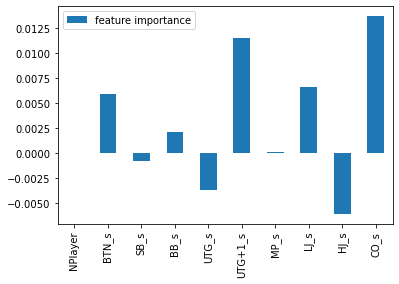

In [ ]:
from sklearn.inspection import permutation_importance
r = permutation_importance(linear_model, X_VTest, y_VTest.loc[:,'BTN_+$'],
                           n_repeats=30,
                           random_state=0)


# Create a sample dataframe with an text index
plotdata = pd.DataFrame(
    {"feature importance": r.importances_mean[0:10]}, 
    index=['NPlayer', 'BTN_s', 'SB_s', 'BB_s', 'UTG_s', 'UTG+1_s', 'MP_s', 'LJ_s', 'HJ_s', 'CO_s'])
# Plot a bar chart
plotdata.plot(kind="bar")

In [ ]:
# Now lets try for BTN profit
linear_model.fit(X_train,y_train.loc[:,'BTN_+$'])
y_fitted = linear_model.predict(X_train)
y_predicted = linear_model.predict(X_val)
training_error = rmse(y_train.loc[:,'BTN_+$'] ,y_fitted)
val_error = rmse(y_val.loc[:,'BTN_+$'] ,y_predicted)
print(training_error, val_error)
metrics.mean_absolute_error(y_val.loc[:,'BTN_+$'], y_predicted)

8.057887630881908 9.803958751854541


1.9393876478063

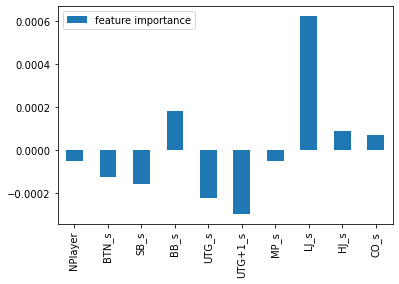

In [ ]:
from sklearn.inspection import permutation_importance
r = permutation_importance(linear_model, X_val, y_val.loc[:,'BTN_+$'],
                           n_repeats=30,
                           random_state=0)


# Create a sample dataframe with an text index
plotdata = pd.DataFrame(
    {"feature importance": r.importances_mean[0:10]}, 
    index=['NPlayer', 'BTN_s', 'SB_s', 'BB_s', 'UTG_s', 'UTG+1_s', 'MP_s', 'LJ_s', 'HJ_s', 'CO_s'])
# Plot a bar chart
plotdata.plot(kind="bar")

# Small Blind

In [ ]:
# Now lets try for SB profit
linear_model.fit(X_train,y_train.loc[:,'SB_+$'])
y_fitted = linear_model.predict(X_train)
y_predicted = linear_model.predict(X_val)
training_error = rmse(y_train.loc[:,'SB_+$'] ,y_fitted)
val_error = rmse(y_val.loc[:,'SB_+$'] ,y_predicted)
print(training_error, val_error)
metrics.mean_absolute_error(y_val.loc[:,'SB_+$'], y_predicted)

8.601787719408302 9.143308073112829


1.8878659641284854

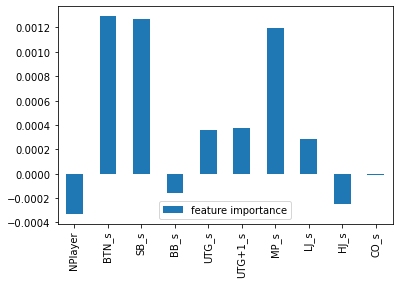

In [ ]:
from sklearn.inspection import permutation_importance
r = permutation_importance(linear_model, X_val, y_val.loc[:,'SB_+$'],
                           n_repeats=30,
                           random_state=0)


# Create a sample dataframe with an text index
plotdata = pd.DataFrame(
    {"feature importance": r.importances_mean[0:10]}, 
    index=['NPlayer', 'BTN_s', 'SB_s', 'BB_s', 'UTG_s', 'UTG+1_s', 'MP_s', 'LJ_s', 'HJ_s', 'CO_s'])
# Plot a bar chart
plotdata.plot(kind="bar")

# Big Blind

In [ ]:
# Now lets try for BTN profit
linear_model.fit(X_train,y_train.loc[:,'BB_+$'])
y_fitted = linear_model.predict(X_train)
y_predicted = linear_model.predict(X_val)
training_error = rmse(y_train.loc[:,'BB_+$'] ,y_fitted)
val_error = rmse(y_val.loc[:,'BB_+$'] ,y_predicted)
print(training_error, val_error)
metrics.mean_absolute_error(y_val.loc[:,'BB_+$'], y_predicted)

8.22544877319696 8.159098024404928


2.3127881841808318

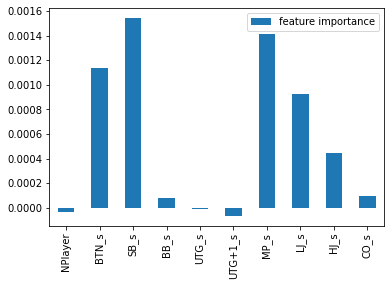

In [ ]:
from sklearn.inspection import permutation_importance
r = permutation_importance(linear_model, X_val, y_val.loc[:,'BB_+$'],
                           n_repeats=30,
                           random_state=0)


# Create a sample dataframe with an text index
plotdata = pd.DataFrame(
    {"feature importance": r.importances_mean[0:10]}, 
    index=['NPlayer', 'BTN_s', 'SB_s', 'BB_s', 'UTG_s', 'UTG+1_s', 'MP_s', 'LJ_s', 'HJ_s', 'CO_s'])
# Plot a bar chart
plotdata.plot(kind="bar")

### Interpreting regression results
The RMSE values for the training error and val error were very similar. This is generally a good sign, and it means the model predicted well. However, the mean absolute error indicates the pot to be off by 10 dollars, and button profit to be off by 2 dollars. 

## Random Forest

The next type will be a random forest.
A random forest may better encapsulate the non-linear relationships in the data. In particular, I suspect the relationship between NPlayers and pot size to be linear, while other relationships may be less so.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=99)


## Button Profit

In [ ]:
#button Nplayer=9
rf.fit(X_trTest, y_trTest.loc[:,'BTN_+$'])
y_fitted = rf.predict(X_trTest)
y_predicted = rf.predict(X_VTest)

training_error = rmse(y_trTest.loc[:,'BTN_+$'] ,y_fitted)
val_error = rmse(y_VTest.loc[:,'BTN_+$'] ,y_predicted)
(training_error, val_error)

(8.644053413662224, 12.838527049701977)

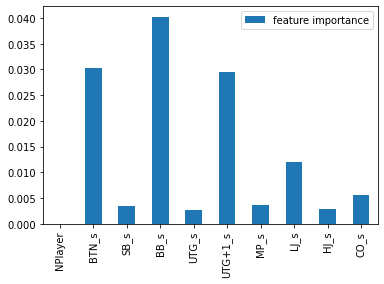

In [ ]:
from sklearn.inspection import permutation_importance
r = permutation_importance(rf, X_val, y_val.loc[:,'BTN_+$'],
                           n_repeats=30,
                           random_state=0)


# Create a sample dataframe with an text index
plotdata = pd.DataFrame(
    {"feature importance": r.importances_mean[0:10]}, 
    index=['NPlayer', 'BTN_s', 'SB_s', 'BB_s', 'UTG_s', 'UTG+1_s', 'MP_s', 'LJ_s', 'HJ_s', 'CO_s'])
# Plot a bar chart
plotdata.plot(kind="bar")

In [ ]:
#button all Nplayer
rf.fit(X_train, y_train.loc[:,'BTN_+$'])
y_fitted = rf.predict(X_train)
y_predicted = rf.predict(X_val)

training_error = rmse(y_train.loc[:,'BTN_+$'] ,y_fitted)
val_error = rmse(y_val.loc[:,'BTN_+$'] ,y_predicted)
(training_error, val_error)

(7.7774938241792055, 9.809440013942481)

In [ ]:
mean_absolute_error(y_val.loc[:,'BTN_+$'], y_predicted)

NameError: name 'mean_absolute_error' is not defined

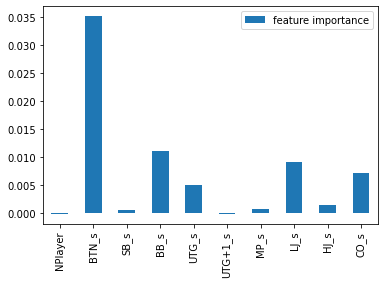

In [ ]:
from sklearn.inspection import permutation_importance
r = permutation_importance(rf, X_val, y_val.loc[:,'BTN_+$'],
                           n_repeats=30,
                           random_state=0)


# Create a sample dataframe with an text index
plotdata = pd.DataFrame(
    {"feature importance": r.importances_mean[0:10]}, 
    index=['NPlayer', 'BTN_s', 'SB_s', 'BB_s', 'UTG_s', 'UTG+1_s', 'MP_s', 'LJ_s', 'HJ_s', 'CO_s'])
# Plot a bar chart
plotdata.plot(kind="bar")

# Small Blind RF

In [ ]:
rf.fit(X_train, y_train.loc[:,'SB_+$'])
y_fitted = rf.predict(X_train)
y_predicted = rf.predict(X_val)

training_error = rmse(y_train.loc[:,'SB_+$'] ,y_fitted)
val_error = rmse(y_val.loc[:,'SB_+$'] ,y_predicted)
(training_error, val_error)

(8.225984040629317, 9.399323045736399)

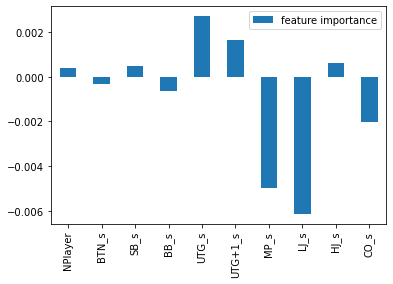

In [ ]:
from sklearn.inspection import permutation_importance
r = permutation_importance(rf, X_val, y_val.loc[:,'SB_+$'],
                           n_repeats=30,
                           random_state=0)


# Create a sample dataframe with an text index
plotdata = pd.DataFrame(
    {"feature importance": r.importances_mean[0:10]}, 
    index=['NPlayer', 'BTN_s', 'SB_s', 'BB_s', 'UTG_s', 'UTG+1_s', 'MP_s', 'LJ_s', 'HJ_s', 'CO_s'])
# Plot a bar chart
plotdata.plot(kind="bar")

# Big Blind RF

In [ ]:
rf.fit(X_train, y_train.loc[:,'BB_+$'])
y_fitted = rf.predict(X_train)
y_predicted = rf.predict(X_val)

training_error = rmse(y_train.loc[:,'BB_+$'] ,y_fitted)
val_error = rmse(y_val.loc[:,'BB_+$'] ,y_predicted)
(training_error, val_error)

(7.9487808040612205, 8.192226210151073)

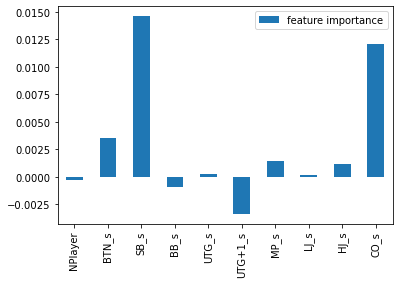

In [ ]:
from sklearn.inspection import permutation_importance
r = permutation_importance(rf, X_val, y_val.loc[:,'BB_+$'],
                           n_repeats=30,
                           random_state=0)


# Create a sample dataframe with an text index
plotdata = pd.DataFrame(
    {"feature importance": r.importances_mean[0:10]}, 
    index=['NPlayer', 'BTN_s', 'SB_s', 'BB_s', 'UTG_s', 'UTG+1_s', 'MP_s', 'LJ_s', 'HJ_s', 'CO_s'])
# Plot a bar chart
plotdata.plot(kind="bar")

## Pot Size

In [ ]:
rf.fit(X_train, y_train.loc[:,'Pot'])
y_fitted = rf.predict(X_train)
y_predicted = rf.predict(X_val)

training_error = rmse(y_train.loc[:,'Pot'] ,y_fitted)
val_error = rmse(y_val.loc[:,'Pot'] ,y_predicted)
(training_error, val_error)

(24.470084831951148, 26.01278860777388)

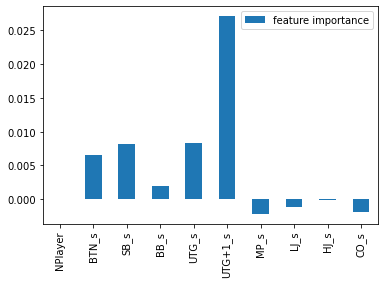

In [ ]:
from sklearn.inspection import permutation_importance
r = permutation_importance(rf, X_val, y_val.loc[:,'Pot'],
                           n_repeats=30,
                           random_state=0)


# Create a sample dataframe with an text index
plotdata = pd.DataFrame(
    {"feature importance": r.importances_mean[0:10]}, 
    index=['NPlayer', 'BTN_s', 'SB_s', 'BB_s', 'UTG_s', 'UTG+1_s', 'MP_s', 'LJ_s', 'HJ_s', 'CO_s'])
# Plot a bar chart
plotdata.plot(kind="bar")

In [ ]:
mean_absolute_error(y_val.loc[:,'Pot'], y_predicted)

NameError: name 'mean_absolute_error' is not defined

### Interpreting RF regression results
Looking at the RMSE values, the val errors appear to be about three times larger than the training errors, not what we want to see. What could be affecting the RF's predictive accuracy? Edit: upon updating the max depth of the RF to 5, the errors are much closer to each other. This value was picked arbitrarily, could do an analysis testing several max depths. No cap on max_depth is asking for overfitting.

The errors are very close to what we got for the linear regression, so it appears the models performed similarly.

# PAST THIS POINT DEVELOPMENTAL

# Comparing model methods

Now that we have both a random forest and linear regression output, which one appears to predict more accurately?
Of course, we are expecting the linear model to be the better due to our results of RMSE above, but let's still compare.

To answer this question, I will be using k-fold cross validation

It is important to keep in mind that the data knowingly does not a player skill variable. One source I read in preparing for this project is that skill dominates over chance after 1500 or so hands. Thankfully, skill should be averaged out by having players of differing skill levels in each seat after 52000 hands. Players do not stay at the same seat, as the blinds rotate around the table.

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
#
# Create an instance of Pipeline
#
pipeline = make_pipeline(StandardScaler(), rf)
#
# Create an instance of StratifiedKFold which can be used to get indices of different training and test folds
# 
strtfdKFold = StratifiedKFold(n_splits=10)
kfold = strtfdKFold.split(X_train, y_train)
scores = []
#
#
#
for k, (train, test) in enumerate(kfold):
    pipeline.fit(X_train.iloc[train, :], y_train.loc[y_train.iloc[train], "BTN_s"])
    score = pipeline.score(X_train.iloc[test, :], y_train.loc[y_train.iloc[test], "BTN_s"])
    scores.append(score)
    print('Fold: %2d, Training/Test Split Distribution: %s, Accuracy: %.3f' % (k+1, np.bincount(y_train.loc[y_train.iloc[train], "BTN_s"]), score))
 
print('\n\nCross-Validation accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))
   

ValueError: Supported target types are: ('binary', 'multiclass'). Got 'continuous-multioutput' instead.

# Experimental - hmmmm

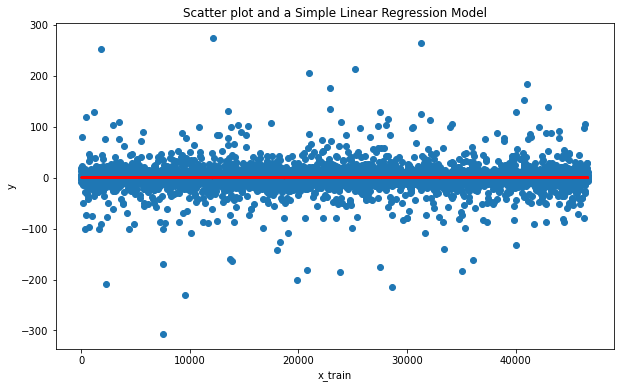

In [ ]:
#y_train.loc[:,'BTN_+$']
#X_train
x_sort= X_train.sort_values(by=['BTN_s'])
xx_train=np.arange(0,len(x_sort),1)


#try to graph a linear regression line
# plotting the regression line on the scatter plot
plt.figure(figsize=(10,6))
plt.scatter(xx_train, y_train.loc[:,'BTN_+$'])
plt.plot(xx_train, y_fitted, c='r')
plt.title('Scatter plot and a Simple Linear Regression Model')
plt.ylabel("y")
plt.xlabel("x_train")
plt.show()


In [ ]:

#make a graph
stacks=['BTN_s', 'SB_s', 'BB_s', 'UTG_s', 'UTG+1_s', 'MP_s', 'LJ_s', 'HJ_s', 'CO_s']
ax = X_train['BTN_s'].value_counts().reindex(stacks).plot(kind='bar')
ax.set_ylabel("Stack ($)")
ax.set_xlabel("Seat Position")
ax.set_title("Size of stack by seat position");




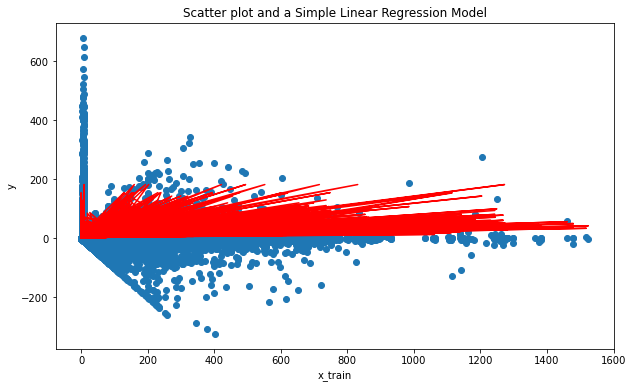

In [ ]:
#try to graph a linear regression line
# plotting the regression line on the scatter plot
plt.figure(figsize=(10,6))
plt.scatter(X_train, y_train)
plt.plot(X_train, y_fitted, c='r')
plt.title('Scatter plot and a Simple Linear Regression Model')
plt.ylabel("y")
plt.xlabel("x_train")
plt.show()

In [ ]:
#Try this for making the graphs more comprehensible
x_sort= X_train.sort_values(by=['BTN_s'])

In [ ]:
'''Creating pipeline structure'''
#remove hands first to check if indexing is messing it up (it is)
#oh2 = remove_nplayer_hands(train, 2)
#oh3 = add_seat_stacks(oh2)
#remove hands with 2 players

#create new stack columns and sort by position in hand
#oh3.reset_index(drop=True, inplace=True)
#oh4 = rearrange_seats(oh3)
#create seat profit columns
#oh5 = add_seat_profit(oh4.head())
#cols =['Pot', 'BTN_+$','SB_+$', 'BB_+$', 'UTG_+$', 'UTG+1_+$', 'MP_+$', 'LJ_+$', 'HJ_+$', 'CO_+$']
#for column in cols:
 #   oh5[column].replace(np.nan, 0, inplace=True)
#make stack column solely a float
#oh6 = stack_text_to_number(oh4.head())

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection

models = []
#models.append(('Linear Regression', ))
#models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('Random Forest', RandomForestClassifier()))

"""
#scale to improve the performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
array = X_train.values
X = array[:,0:8]
Y = array[:,8]
"""

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    cv_results = model_selection.cross_val_score(model, X_train, y_train.loc[:,'BTN_+$'], cv=10, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
boxplot = sns.boxplot(box_data=results)
boxplot.set_xticklabels(names)
plt.ylabel("Accuracy")